In [0]:
#Codigo Criado por Luiz Eduardo Soares Emidio da Silva durante o desenvolvimento de um PIBIC 
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers
from keras.models import Model

from keras import backend as K 
K.set_learning_phase(1)


import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import tensorflow as tf
import seaborn as sns



Using TensorFlow backend.


In [0]:
#Configurações Arbritarias escolhidas para treinamento
batch_size = 128
num_classes = 10
epochs = 10

#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

11493376/11490434 [==============================] - 0s 0us/step


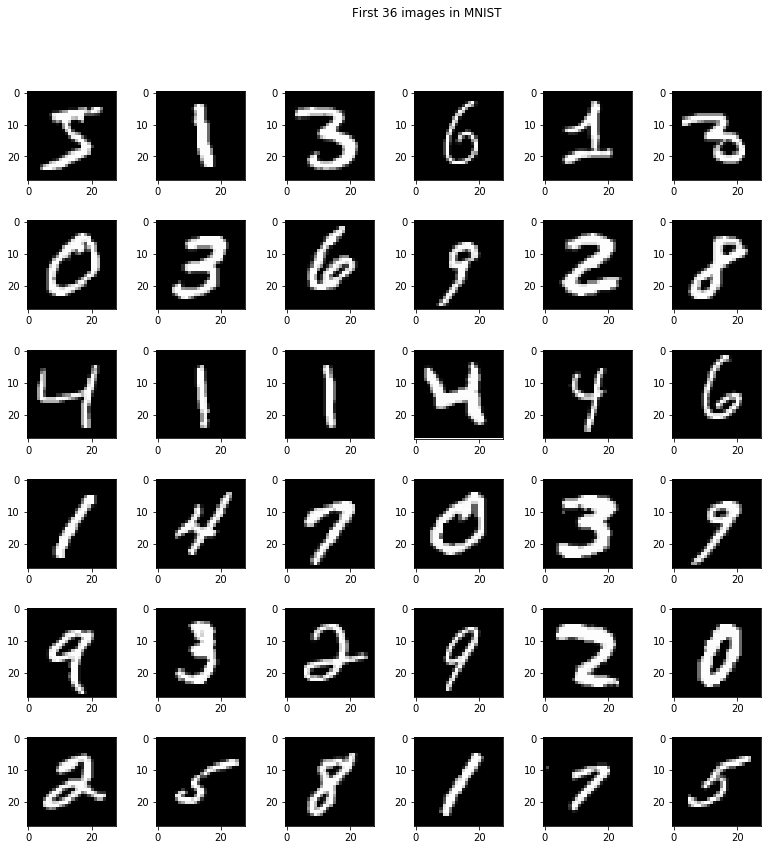

In [0]:
#Carregando imagens e plotando alguns exemplos 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])




In [0]:
#Inserir estrutura da CNNs nessa parte do codigo
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(28, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(28, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 

 












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Inserir model.compile com os parametros desejados
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 28)        280       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 28)        112       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 28)        7084      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 28)        112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 28)       

In [0]:
#model.fit para executar treinamento
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
results = model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          #validation_data=(x_test, y_test))
          validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 426us/step - loss: 0.3516 - acc: 0.9157 - val_loss: 0.1381 - val_acc: 0.9697
Epoch 2/10
48000/48000 [==============================] - 15s 320us/step - loss: 0.1246 - acc: 0.9750 - val_loss: 0.0945 - val_acc: 0.9833
Epoch 3/10
48000/48000 [==============================] - 15s 319us/step - loss: 0.0985 - acc: 0.9830 - val_loss: 0.0850 - val_acc: 0.9870
Epoch 4/10
48000/48000 [==============================] - 16s 325us/step - loss: 0.0837 - acc: 0.9866 - val_loss: 0.0885 - val_acc: 0.9861
Epoch 5/10
48000/48000 [==============================] - 16s 325us/step - loss: 0.0762 - acc: 0.9888 - val_loss: 0.0838 - val_acc: 0.9876
Epoch 6/10
48000/48000 [==============================] - 16s 327us/step - loss: 0.0693 - acc: 0.9909 - val_loss: 0.0755 - val_acc: 0.9888
Epoch 7/10
48000/480

In [0]:
#Realiza avaliação final da rede 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.06284530063867569
Test accuracy: 0.992


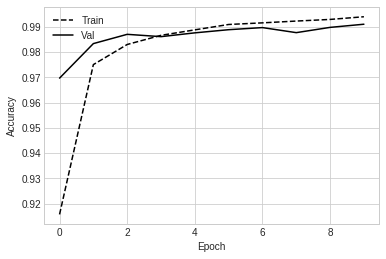

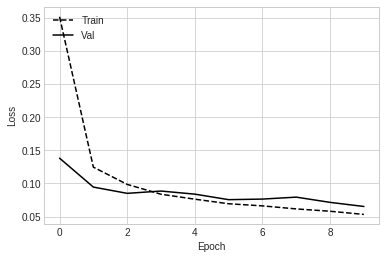

In [0]:
# Plota o grafico do histórico de evolução da taxa de acertos da rede
sty.use('seaborn-whitegrid')
plt.plot(results.history['acc'],'k--')
plt.plot(results.history['val_acc'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()





# Plota o grafico do histórico de evolução da taxa de perda da rede 
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [0]:
y_predict = model.predict_classes(x_test)

In [0]:
cm = confusion_matrix(np.argmax(y_test,axis=1),y_predict)

In [0]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']

In [0]:
#Função para realizar e plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 977    0    0    0    0    1    1    1    0    0]
 [   0 1130    1    1    0    0    1    2    0    0]
 [   1    1 1025    0    0    0    0    4    1    0]
 [   0    0    0 1006    0    2    0    1    1    0]
 [   0    0    0    0  974    0    0    0    0    8]
 [   0    0    0    3    0  886    1    1    0    1]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    2    4    1    0    0    0 1021    0    0]
 [   0    1    1    0    0    1    1    1  967    2]
 [   1    0    1    0    5    2    1    2    2  995]]


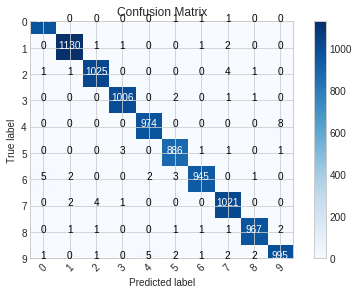

In [0]:
plot_confusion_matrix(cm,cm_plot_labels,title ='Confusion Matrix')

In [0]:
# plota os mapas de features

layer_dict = dict([(layer.name, layer) for layer in model.layers])
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 10, 10
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
model = Model(inputs=model.input, outputs=model.get_layer('flatten_1').output)
features = model.predict(x_train)
